# SI140A Project

$\textbf{Performance Evaluation of Bandit Learning Algorithms}$

# Part I

In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import json
import os
from os.path import join
from IPython.display import Latex

def show_img(img_path): 
    img = imread(img_path)
    fig = plt.figure(figsize=(12, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Question 1

If we know the values of $\theta_j$ and $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$.
\begin{align*}
    \begin{array}{|c|c|c|c|}
    \hline \text { Arm } j & 1 & 2 & 3 \\
    \hline \theta_j & 0.7 & 0.5 & 0.4 \\
    \hline
    \end{array}
\end{align*}

\begin{align*}
    \mathbb{E} \left[ \sum_{t=1}^{N} r_{I(t)} \right]
    = \sum_{t=1}^{N} \mathbb{E} \left[  r_{I(t)} \right]
    = \sum_{t=1}^{N} \theta_{I(t)}
\end{align*}

\begin{align*}
    \argmax\limits_{I(t), t = 1,\dots,N}\mathbb{E} 
    \left[ \sum_{t=1}^{N} r_{I(t)} \right] 
    = \sum_{t=1}^{5000} \theta_{I(1)}
    = 5000 \times 0.7
    = 3500
\end{align*}

We will always choose the first arm( which is of the highest probability).
And the theoretically maximul expectation of aggregate reward over 5000 time slots is 3500.

The following code is the simulation of theoretically maximized expectation of aggregate rewards over 5000 time slots.
And we run 200 times and calculate the average reward.

In [15]:
# simulation of theoretically maximized expectation of aggregate rewards over 5000 time slots

def theoretically_maximized_rewards(probability, sample_num):
    n = probability.shape[0]
    total_num = np.zeros(n)
    win_num = np.zeros(n)
    theta = np.ones(n)
    reward = 0
    
    for iterate in range(sample_num):
        index = int(np.argmax(probability))
        
        if(random.random() < probability[index]):
            win_num[index] += 1
        total_num[index] += 1
        theta[index] = win_num[index] / total_num[index]
        
    reward = np.sum(win_num)
    return reward 
        
probability = np.array([0.7, 0.5, 0.4])
N = 5000
iterate_times = 200
reward_list = np.zeros(iterate_times)
for iterate in range(iterate_times):
    reward_list[iterate] = theoretically_maximized_rewards(probability, N)
    
reward_mean = np.mean(reward_list)
reward_var = np.var(reward_list) 

print("rewards =", reward_mean, "var =", reward_var)

rewards = 3497.67 var = 997.1310999999998


## Question 2

### $\epsilon$-greedy algorithm

In [16]:
def epsilon_algorithm(probability, epsilon, sample_num):
    n = probability.shape[0]
    total_num = np.zeros(n)
    win_num = np.zeros(n)
    theta = np.ones(n)
    reward = 0
    
    for iterate in range(sample_num):
        if(random.random() < epsilon):
            index = random.randint(0, n - 1)
        else:
            index = int(np.argmax(theta))

        if(random.random() < probability[index]):
            win_num[index] += 1
        total_num[index] += 1
        theta[index] = win_num[index] / total_num[index]
        
    reward = np.sum(win_num)
    return reward

### UCB algorithm

In [17]:
def UCB_algorithm(probability, c, sample_num):
    n = probability.shape[0]
    total_num = np.zeros(n)
    win_num = np.zeros(n)
    theta = np.ones(n)
    reward = 0
    
    for index in range(n):
        if(random.random() < probability[index]):
            win_num[index] += 1
        total_num[index] += 1
        theta[index] = win_num[index] / total_num[index]
    
    for iterate in range(1, sample_num):
        para = theta + c * np.sqrt(2 * np.log(iterate) / total_num)
        index = int(np.argmax(para))
        
        if(random.random() < probability[index]):
            win_num[index] += 1
        total_num[index] += 1
        theta[index] = win_num[index] / total_num[index]

    reward = np.sum(win_num)
    return reward

### TS algorithm

In [18]:
def TS_algorithm(probability, prior_Beta_parameter, sample_num):
    Beta_parameter = np.copy(prior_Beta_parameter)
    n = probability.shape[0]
    total_num = np.zeros(n)
    win_num = np.zeros(n)
    reward = 0
    
    for iterate in range(sample_num):
        sample = np.zeros(n)
        for i in range(n):
            sample[i] = np.random.beta(Beta_parameter[i][0], Beta_parameter[i][1])
        index = int(np.argmax(sample))
        
        if(random.random() < probability[index]):
            win_num[index] += 1
            Beta_parameter[index][0] += 1
        else:
            Beta_parameter[index][1] += 1
        total_num[index] += 1
        
    reward = np.sum(win_num)
    return reward

## Question 3

In [13]:
# initialization parameter

probability = np.array([0.7, 0.5, 0.4])
N = 5000
run_time = 200

### $\epsilon$-greedy algorithm

epsilon = 0.1 reward = 3397.375
epsilon = 0.5 reward = 2999.76
epsilon = 0.9 reward = 2598.53


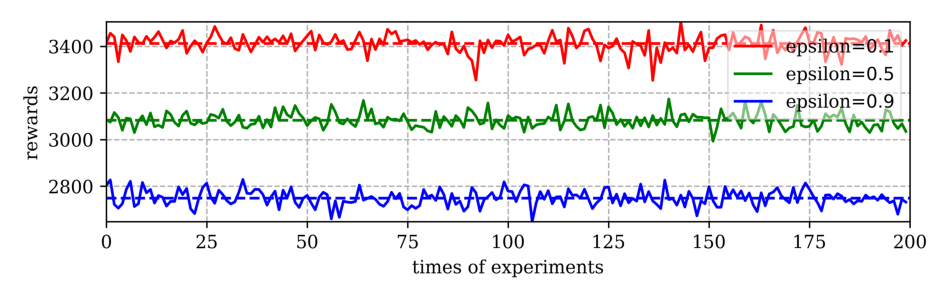

In [44]:
# simulation

epsilon = np.array([0.1, 0.5, 0.9])
epsilon_reward = np.zeros(3)

for i in range(3):
    epsilon_reward_list = np.zeros(run_time)
    for iterate in range(run_time):
        epsilon_reward_list[iterate] = epsilon_algorithm(probability, epsilon[i], N)
    
    epsilon_reward[i] = np.mean(epsilon_reward_list)
    result.append(epsilon_reward_list.tolist())
    print('epsilon =', epsilon[i], 'reward =', epsilon_reward[i])



# visulation

show_img(join('./figures/P1Q3/epsilon_greedy.png'))

### UCB algorithm

c = 1 reward = 3472.7
c = 5 reward = 3170.46
c = 10 reward = 2927.355


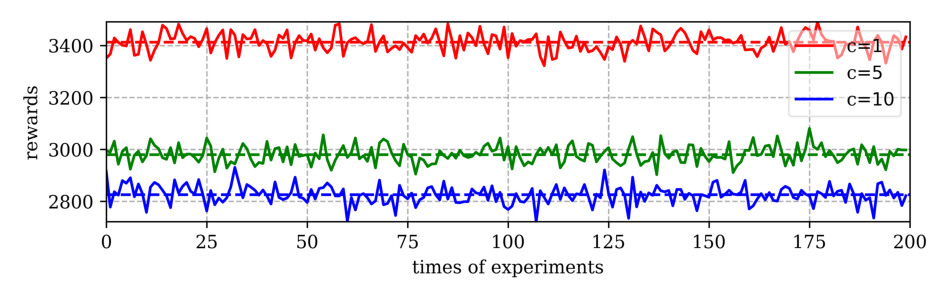

In [45]:
# simulation

c = np.array([1, 5, 10])
UCB_reward = np.zeros(3)

for i in range(3):
    UCB_reward_list = np.zeros(run_time)
    for iterate in range(run_time):
        UCB_reward_list[iterate] = UCB_algorithm(probability, c[i], N)

    UCB_reward[i] = np.mean(UCB_reward_list)
    print('c =', c[i], 'reward =', UCB_reward[i])
    


# visulation

show_img(join('./figures/P1Q3/UCB.png'))

### TS algorithm

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

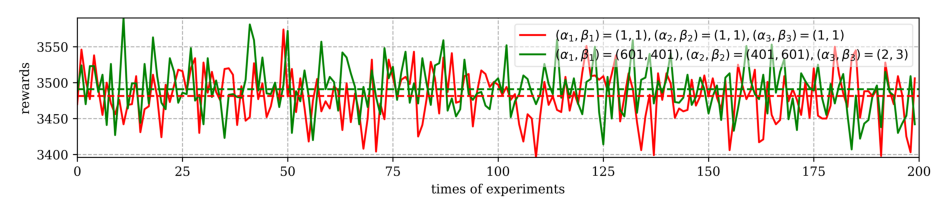

In [46]:
# simulation

Beta_parameter = np.array([[[1,1],[1,1],[1,1]], 
                           [[601,401],[401,601],[2,3]]])
TS_reward = np.zeros(2)

for i in range(2):
    TS_reward_list = np.zeros(run_time)
    for iterate in range(run_time):
        TS_reward_list[iterate]= TS_algorithm(probability, Beta_parameter[i], N)
    
    TS_reward[i] = np.mean(TS_reward_list)
    latex_expression = rf'''$\alpha_1={Beta_parameter[i][0][0]}\space
                           \beta_1={Beta_parameter[i][0][1]}\space
                           \alpha_2={Beta_parameter[i][1][0]}\space
                           \beta_2={Beta_parameter[i][1][1]},\space 
                           \text{{reward}}={TS_reward[i]}$'''
    display(Latex(latex_expression))



# visulation

show_img(join('./figures/P1Q3/TS.png'))

## Question 4

Compute the gap

In [28]:
# Compute the gaps

oracle_value = 3500
print("----------------------------------------------")
print('epsilon-greedy algorithm')
for i in range(3):
    gap = abs(oracle_value - epsilon_reward[i])
    print('epsilon =', epsilon[i], '\t', 'gap =', gap)
print("----------------------------------------------")
print('UCB algorithm')
for i in range(3):
    gap = abs(oracle_value - UCB_reward[i])
    print('c =', c[i], '\t', 'gap =', gap)
print("----------------------------------------------")
print('TS algorithm')
for i in range(2):
    gap = abs(oracle_value - TS_reward[i])
    latex_expression = rf'''$\alpha_1 = {Beta_parameter[i][0][0]} \space
                             \beta_1  = {Beta_parameter[i][0][1]} \space
                             \alpha_2 = {Beta_parameter[i][1][0]} \space
                             \beta_2  = {Beta_parameter[i][1][1]} \space$'''
    display(Latex(latex_expression))
    print("gap =", gap)
print("----------------------------------------------")

----------------------------------------------
epsilon-greedy algorithm
epsilon = 0.1 	 gap = 91.16499999999996
epsilon = 0.5 	 gap = 418.78999999999996
epsilon = 0.9 	 gap = 753.5
----------------------------------------------
UCB algorithm
c = 1 	 gap = 83.19000000000005
c = 5 	 gap = 513.2150000000001
c = 10 	 gap = 674.5900000000001
----------------------------------------------
TS algorithm


<IPython.core.display.Latex object>

gap = 12.829999999999927


<IPython.core.display.Latex object>

gap = 10.929999999999836
----------------------------------------------


##### The impact of $\epsilon$:
As $\epsilon$ gets larger and larger, the reward will first rise and then fall. We find that $\epsilon = 0.04$ has the best result.

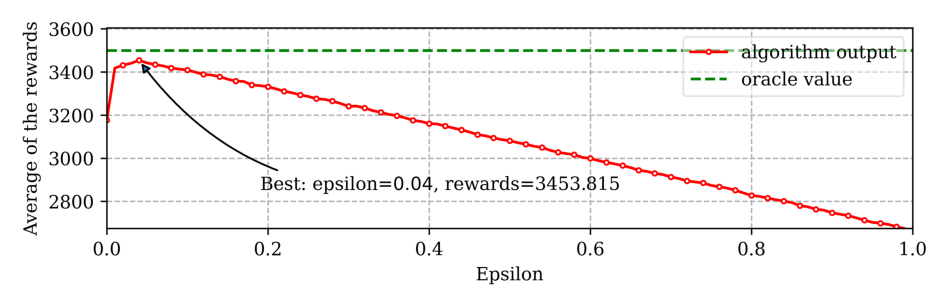

In [47]:
show_img(join('./figures/P1Q4/epsilon_best.png'))

##### The impact of $c$:
As the $c$ gets larger and larger, the reward will first rise and then fall (The curve appears as a quadratic function with a downward opening). We find that $c = 0.3$ has the best result.

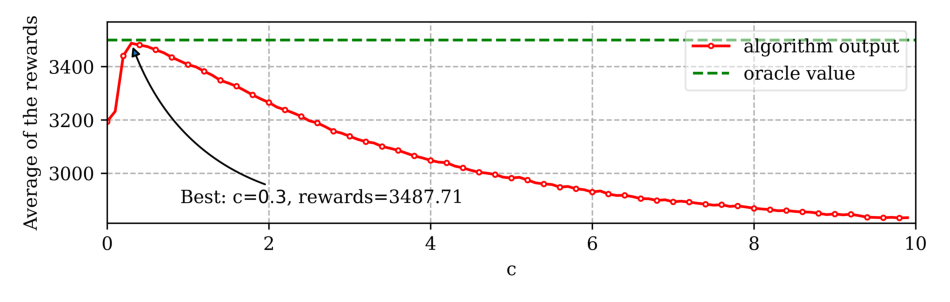

In [48]:
show_img(join('./figures/P1Q4/c_best.png'))

### The impact of $\alpha, \beta$:

$\alpha, \beta$ can be seen as the prior probability of $\theta_i$, we discuss the impact of accuracy and confidence.

\begin{align*}
    \begin{array}{|c|c|c|}
    \hline
    & \textbf{Strong} & \textbf{Weak} \\
    \hline
    \textbf{Accurate} & \text{accurate and strong} & \text{accurate and weak} \\
    \hline
    \textbf{Inaccurate} & \text{inaccurate and strong} & \text{inaccurate and weak} \\
    \hline
    \end{array}
\end{align*}

According to the visualization of parameters we have tested, we draw the conclusion that the accurate prior probability will lead to satisfying result directly. However, when the prior probability is not accurate, it will eliminate the reward, and stronger confidence makes matters worse.

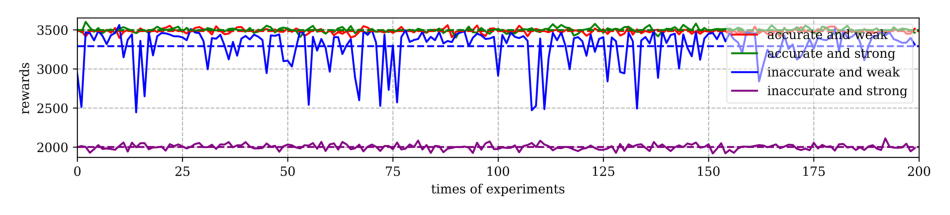

In [49]:
show_img(join('./figures/P1Q4/TS_best.png'))

## Question 5

$\epsilon$-greedy algorithm has parameter $\epsilon$ to determine whether we need to explore or exploit. For each time slot $t$, we have probability $\epsilon$ to choose an random arm to explore and probability $1-\epsilon$ to choose the arm with highest probability $\hat{\theta}_{I^*}$ ($I^* = \arg \max _{j\in \{1,2,3\}} \theta_j$) depend on our posterior probability to get a reward. 

UCB algorithm introduce an idea: uncertain behavior takes precedence. $\text{count} (j)$ is the time that $j$-th arm has been selected and $\sqrt{\frac{2 \log (t)}{\text{count} (j)}}$ is the uncertainty of $j$-th arm. For each time slot $t$, we choose the arm with max $\hat{\theta}_j + c \cdot \sqrt{\frac{2 \log (t)}{\text{count} (j)}}$, which is a combination of reward and uncertainty. It has parameter $c$ to control confidence coefficient.

TS algorithm suppose that $\theta_j \sim \text{Beta}(\alpha_j, \beta_j)$. It gives a prior probability and updates the posterior probability during sampling. It has parameters $a_j, b_j ~ (j \in \{1,2,3\})$.

In bandit algorithms, with limited initial funding, we need to weigh the number of explorations and exploitations to maximize profit. The advantage of this method is that the posterior probability of each arm $\hat{\theta}_j$ will be updated each time according to the new sampling. In the exploration stage, we will keep exploring and digging more results to optimize the algorithm. In the exploitation stage, we will exploit according to the results obtained in the first stage to get the optimal solution.

## Question 6

We test two dependent situations of the reward of the distribution.

1. Situation1 is that the sum of the distribution of all the arms equals to 1, $\theta_1 + \theta_2 + \theta_3 = 1$.

2. Situation2 is that the win or loss of one arm will change the distribution of other arms.

\begin{align*}
    \begin{array}{|c|c|}
    \hline
    & \textbf{Definition}\\
    \hline
    \textbf{Situation1} & \text{the sum of the distribution of all the arms equals to 1, where $\theta_1 + \theta_2 + \theta_3 = 1$.} \\
    \hline
    \textbf{Situation2} & \text{the win or loss of one arm will influence the distribution of other arms.} \\
    \hline
    \end{array}
\end{align*}

#### Situation1

The following is the first situation, we have $\theta_1 + \theta_2 + \theta_3 = 1$, we compare the $\epsilon$-greedy, UCB, TS algorithm and our optimized algorithm.

Our optimized algorithm will update $\hat{\theta}$ with the known condition that $\theta_1 + \theta_2 + \theta_3 = 1$, which means the update of one arm's probability will also influence the other two arms' probabilities. 

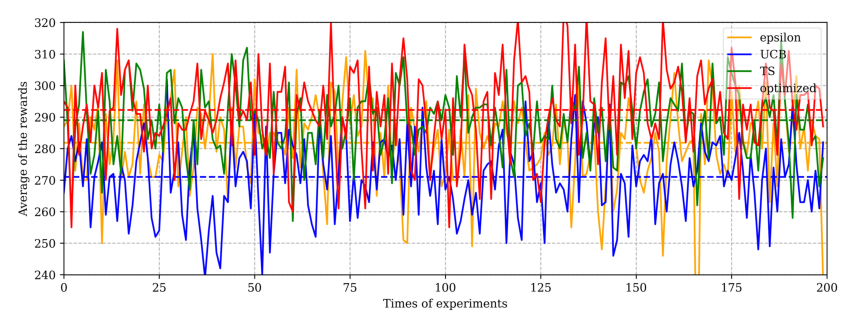

In [50]:
show_img('./figures/P1Q6/compare1.png')

#### Situation2

Suppose the reward distribution of these three arms are dependent, the rules are as follows:

1. If $i$-th arm win, then the win rate of $i$-th arm $\theta_i$ will decrease by $\Delta \theta_{\text{decrease}}$.
2. If $i$-th arm loss, then the win rate of all arms $\theta$ will increase by $\Delta \theta_{\text{increase}}$.

The parameters of our simulation are as follows:

\begin{align*}
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
\text{parameters} & \Delta \theta_{\text{decrease}} & \Delta \theta_{\text{increase}} & \theta_1 & \theta_2 & \theta_3 & \alpha_i & \beta_i \\
\hline
\text{Value} & 0.01 & 0.001 & 0.7 & 0.5 & 0.4 & 1 & 1 \\
\hline
\end{array}
\end{align*}


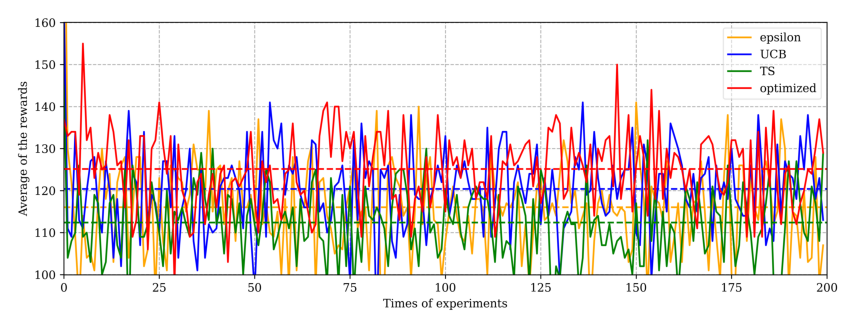

In [51]:
show_img('./figures/P1Q6/compare2.png')


# Part II

## Question 1


Suppose we have $\gamma = 0.99$ and allow intuitive policy which means we always pull the arm with largest expected value $\theta_j$.  
We define parameters as follows
\begin{align*}
\begin{array}{|c|c|c|c|}
\hline
\text{parameters} & \gamma  & \theta_1 & \theta_2 \\
\hline
\text{Values} & 0.99 & 0.7 & 0.3 \\
\hline
\end{array}
\end{align*}

We design an algorithm of intuitive policy as follow.

In [34]:
# parameters

gamma = 0.99
N = 5000
probability = np.array([0.7, 0.3])

In [57]:
# simulation

def intuitive_policy(probability, sample_num, gamma):
    n = probability.shape[0]
    total_num = np.zeros(n)
    win_num = np.zeros(n)
    theta = np.ones(n)
    reward = 0
    gamma_n = 1
    
    for iterate in range(sample_num):
        index = int(np.argmax(theta))
        
        if(random.random() < probability[index]):
            win_num[index] += 1
            reward += gamma_n
        total_num[index] += 1
        theta[index] = win_num[index] / total_num[index]
        gamma_n *= gamma
        
    return reward

iterate_time = 100
reward_list = np.zeros(iterate_time)
for iterate in range(iterate_time):
    reward_list[iterate] = intuitive_policy(probability, N, gamma)

reward_mean = np.mean(reward_list)
intuitive_policy_relust = reward_mean

print('gamma =', gamma, 'reward =', reward_mean)

gamma = 0.99 reward = 63.875462087067646


## Question 2

The result of intuitive policy is heavily influenced by the initial trials and may have bad solutions. For example, the probabilities of two arms is $\theta_1 = 0.7, \theta_2 = 0.3$. However, if the first several trials of $1_{st}$ arm are all loss, we may consider that $1_{st}$ arm with reward rate $\hat{\theta_1}=0$ and never pull it. 

We draw a picture to show the bad result of intuitive policy.

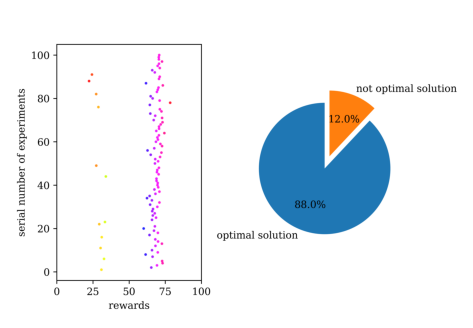

In [52]:
show_img('./figures/P2Q2/intuitive_policy.png')


## Question 3

Denote function $R_i(\alpha_i, \beta_i)$ as the maximal reward of pulling the $i_{th}$ arm at first step.

Denote function $R(\alpha_1, \beta_1, \alpha_2, \beta_2)$ as the expected total maximal reward based on the reward probability of $\alpha_1, \beta_1, \alpha_2, \beta_2$. At each step, to get maximal reward we intuitively choose the arm with maximal probability $\hat{\theta}_i$ to win. So we have
\begin{align*}
    R(\alpha_1, \beta_1, \alpha_2, \beta_2) 
    = \max \left\{ R_1(\alpha_1, \beta_1), R_2(\alpha_2, \beta_2) \right\}
\end{align*}

Suppose we choose $1_{st}$ arm, we have $\hat{\theta}_1 = \frac{\alpha_1}{\alpha_1 + \beta_1}$ probability to win and $1 - \hat{\theta}_1 = \frac{\beta_1}{\alpha_1 + \beta_1}$ probability to lose.

If we win, we update parameters $\alpha_1' = \alpha_1 + 1$, 
$\text{total reward} = 1 + \gamma R(\alpha_1', \beta_1, \alpha_2, \beta_2) = 1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)$

If we lose, we update parameters $\beta_1' = \beta_1 + 1$, 
$\text{total reward} = 0 + \gamma R(\alpha_1, \beta_1', \alpha_2, \beta_2) = \gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2)$

So if we first choose $1_{st}$ arm, the maximal reward is 
\begin{align*}
    &~~~~R_1 (\alpha_1, \beta_1)    \\ 
    &= \hat{\theta}_1 \left[ 1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2) \right]     
    + (1 - \hat{\theta}_ 1) \left[\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2) \right]  \\
    &= \frac{\alpha_1}{\alpha_1 + \beta_1} \left[ 1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2) \right]     
    + \frac{\beta_1}{\alpha_1 + \beta_1} \left[\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2) \right]  
\end{align*}

If we first choose $2_{nd}$ arm, we can prove in the same way
\begin{align*}
    &~~~~R_2 (\alpha_2, \beta_2)    \\ 
    &= \hat{\theta}_2 \left[ 1 + \gamma R(\alpha_1, \beta_1, \alpha_2 + 1, \beta_2) \right]     
    + (1 - \hat{\theta}_ 2) \left[\gamma R(\alpha_1, \beta_1, \alpha_2, \beta_2 + 1) \right]  \\
    &= \frac{\alpha_2}{\alpha_2 + \beta_2} \left[ 1 + \gamma R(\alpha_1, \beta_1, \alpha_2 + 1, \beta_2) \right]     
    + \frac{\beta_2}{\alpha_2 + \beta_2} \left[\gamma R(\alpha_1, \beta_1, \alpha_2, \beta_2 + 1) \right]  
\end{align*}



## Question 4

As it is a recursive equation and no boundary conditions are given, it is difficult to solve it exactly. So we use the approximate method to solve it.

We noticed that when we explored enough time, our estimated probability of each arm is fixed, which means we assumed that $\hat{\theta}_i = \frac{\alpha_i}{\alpha_i + \beta_i} \approx \theta_i$. 

Suppose $\hat{\theta}_{\max} = \max \{\hat{\theta}_1, \hat{\theta}_2\}$, we choose $\alpha, \beta = \alpha_{max}, \beta_{max}$. Suppose we have explored enough time then we will have the following equation.



\begin{align*}
    &~~~~R(\alpha, \beta) \\
    &= \frac{\alpha}{\alpha + \beta} \left[ 1 + \gamma R(\alpha + 1, \beta) \right]     
     + \frac{\beta}{\alpha + \beta} \left[\gamma R(\alpha, \beta + 1) \right]\\
    &\approx \frac{\alpha}{\alpha + \beta} \left[ 1 + \gamma R(\alpha, \beta) \right]     
     + \frac{\beta}{\alpha + \beta} \left[\gamma R(\alpha, \beta) \right]\\
    &= \frac{\alpha}{\alpha + \beta} + \gamma R(\alpha, \beta)\\
\end{align*} 
Thus we have $R(\alpha, \beta) = \frac{\alpha}{\alpha + \beta} \cdot \frac{1}{1-\gamma}$

We assume that after we explore 100 time, then the probability is converged.

In [39]:
R_dict = {}

def R(a1, b1, a2, b2, gamma, count=0, converged_time=100):
   if ((a1, a2, b1, b2) in R_dict):
      return R_dict[(a1, a2, b1, b2)]
   
   if (count > converged_time):
      R1 = a1 / (a1 + b1) / (1-gamma)
      R2 = a2 / (a2 + b2) / (1-gamma)
      if (R1 > R2):
         return R1
      else:
         return R2

   R1 = a1 / (a1 + b1) * (1 + gamma * R(a1 + 1, b1, a2, b2, gamma, count + 1)) \
      + b1 / (a1 + b1) * (gamma * R(a1, b1 + 1, a2, b2, gamma, count + 1))
    
   R2 = a2 / (a2 + b2) * (1 + gamma * R(a1, b1, a2 + 1, b2, gamma, count + 1)) \
      + b2 / (a2 + b2) * (gamma * R(a1, b1, a2, b2 + 1, gamma, count + 1))

   if (R1 > R2):
      reward = R1
   else:
      reward = R2

   R_dict[(a1, a2, b1, b2)] = reward

   return reward

iterate_time = 1
reward_list = np.zeros(iterate_time)
alpha1 = probability[0] * 100
alpha2 = probability[1] * 100
beta1 = 100 - alpha1
beta2 = 100 - alpha2
for iterate in range(iterate_time):
    reward_list[iterate] = R(alpha1, beta1, alpha2, beta2, gamma)
    
reward_mean = np.mean(reward_list)
print('gamma =', gamma, 'reward =', reward_mean)

gamma = 0.99 reward = 69.99999999999987


## Question 5

From Part I Question 4, we have known that the impact of the prior probability $\alpha, \beta$. If the prior probability is weak, no matter whether it is accurate or inaccurate, the result may be satisfactory. We also find that given a suitable prior probability will effectively avoid the bad result of intuitive policy. 

The optimal policy:

Just like the TS algorithm, we give a prior probability and always choose the one with biggest posterior probability. The best result is the same as expected result in Question3.

gamma = 0.99 reward = 67.12987950772198
imporved rate = 5.09494149133245 %


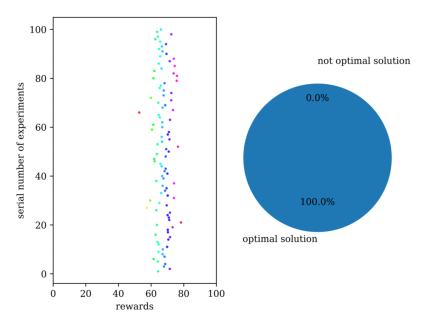

In [59]:
# simulation

def optimal_policy(probability, sample_num, gamma, prior_Beta_parameter):
    Beta_parameter = np.copy(prior_Beta_parameter)
    n = probability.shape[0]
    reward = 0
    gamma_n = 1
    
    for iterate in range(sample_num):
        sample = np.zeros(n)
        for i in range(n):
            sample[i] = np.random.beta(Beta_parameter[i][0], Beta_parameter[i][1])
        index = int(np.argmax(sample))
        
        if(random.random() < probability[index]):
            reward += gamma_n
            Beta_parameter[index][0] += 1
        else:
            Beta_parameter[index][1] += 1
            
        gamma_n *= gamma
        
    return reward


prior_Beta_parameter = np.array([[1,1],[1,1]])      
iterate_time = 100
reward_list = np.zeros(iterate_time)
for iterate in range(iterate_time):
    reward_list[iterate] = optimal_policy(probability, N, gamma, prior_Beta_parameter)

reward_mean = np.mean(reward_list)
optimal_policy_result = reward_mean

print('gamma =', gamma, 'reward =', reward_mean)
print('imporved rate =', (optimal_policy_result / intuitive_policy_relust - 1) * 100, '%')
show_img('./figures/P2Q5/optimal_policy.png')

We can see that our optimal policy will effectively avoid previous bad situations and reach the expected best reward.